In [2]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
def get_mnist(limit=None):
    print("Reading in and transforming data...")
    with zipfile.ZipFile("mnist_train.csv.zip") as thezip:
        thezip.extractall()

    df = pd.read_csv("mnist_train.csv")
    print(df.shape)
    data = df.to_numpy()
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0...255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y


In [7]:
def get_data():
    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((300, 2)) * 2 - 1
    Y = np.sign(X.dot(w) + b)
    return X, Y

def get_simple_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    return X, Y

In [5]:
class Perceptron:
    def fit(self, X, Y, learning_rate=1.0, epochs=1000):
        D = X.shape[1]
        self.w = np.random.randn(D)
        self.b = 0

        N = len(Y)
        costs = []

        for epoch in range(epochs):
            Yhat = self.predict(X)
            incorrect = np.nonzero(Y != Yhat)[0]
            if len(incorrect) == 0:
                break
            i = np.random.choice(incorrect)
            self.w += learning_rate*Y[i]*X[i]
            self.b += learning_rate*Y[i]

            c = len(incorrect) / float(N)
            costs.append(c)
        print("Final w:", self.w, "Final b:", self.b, "epcochs:", (epoch + 1), "/", epochs)
        plt.plot(costs)
        plt.show()

    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

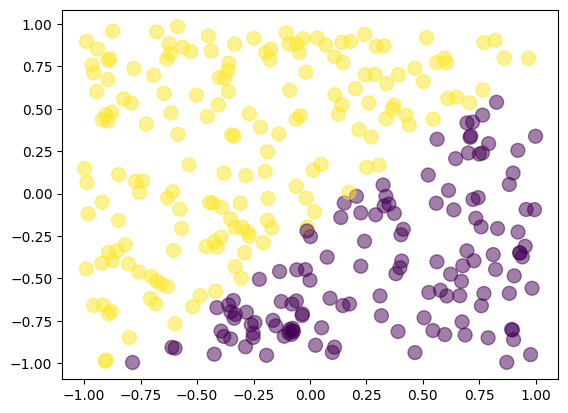

Final w: [-5.0604804   5.07887839] Final b: 1.0 epcochs: 72 / 1000


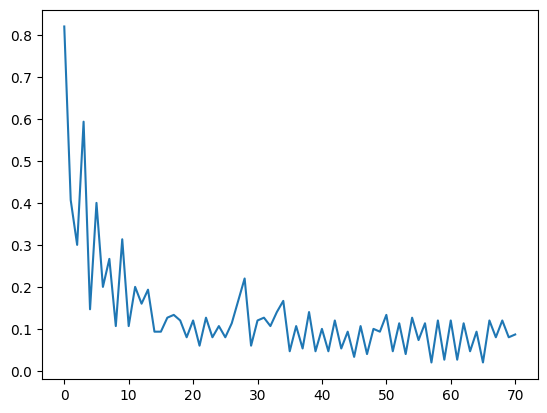

Training time: 0:00:00.465173
Train accuracy: 0.0
Time to compute train accuracy: 0:00:00.001101 Train size: 150
Test accuracy: 0.0
Time to compute test accuracy: 0:00:00.015329 Test size: 150


In [6]:
X, Y = get_data()
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

Ntrain = len(Y) // 2
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

model = Perceptron()
t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("Training time:", datetime.now() - t0)

t0 = datetime.now()
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Time to compute train accuracy:", datetime.now() - t0, "Train size:", len(Ytrain))

t0 = datetime.now()
print("Test accuracy:", model.score(Xtest, Ytest))
print("Time to compute test accuracy:", datetime.now() - t0, "Test size:", len(Ytest))

Reading in and transforming data...
(60000, 785)
Final w: [ 0.22764511 -0.1679604   0.60069598  0.50792032  0.30427983  0.96692132
  1.2393849  -0.75821466 -0.23270353 -1.02409923  0.23800943  0.1250872
 -1.39947117  0.83871301  0.64937174 -0.14806468 -0.69427207 -0.6413968
  0.25264726 -1.04270992  0.11759309 -0.72518995  0.33796821  1.69840412
 -0.1213263   1.2540469  -0.26887642  0.28008829  1.1227482  -0.81872605
 -0.00332741 -0.86919797  0.25108933  0.57677833 -1.16135688 -0.53489915
 -1.09859348  0.48362906 -1.85252411 -0.70733818  0.53139805 -0.45614117
 -1.14137493 -0.87058839 -1.29884421 -1.04820387  0.61444676 -0.88050979
 -0.53235152  0.23715628 -0.49520348  0.02099607  1.1590807   0.81902909
 -1.37811701  0.99701655  0.90099701 -2.16060521 -1.03878964 -1.5660424
 -0.27054038 -0.50049367  2.1266494  -0.54748482  0.04738834 -0.1090754
  0.32371705  1.30467028  0.63113496  0.76526109 -2.70295693  0.33647512
  2.33408688 -1.23008372 -0.84172691 -1.02579857 -2.21995969  1.383373

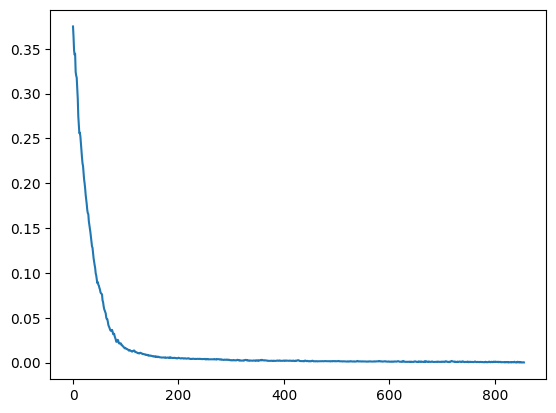

Training time: 0:00:07.348363
MNIST train accuracy: 0.0

XOR results
Final w: [-0.4051736   0.27613813] Final b: 1.0 epcochs: 1000 / 1000


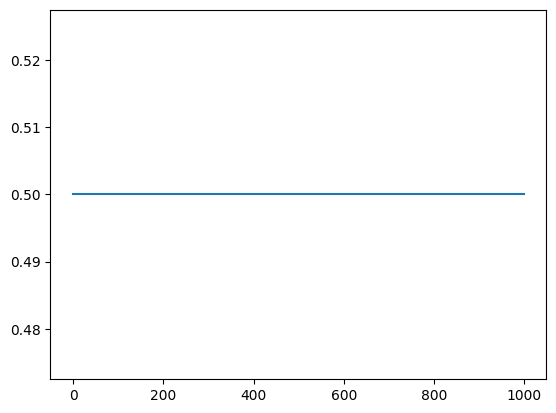

XOR accuracy: 0.5


In [9]:
X, Y = get_mnist()
idx = np.logical_or(Y == 0, Y == 1)
X = X[idx]
Y = Y[idx]
Y[Y==0] = -1



model = Perceptron()
t0 = datetime.now()
model.fit(X, Y, learning_rate=10e-3)
print("Training time:", datetime.now() - t0)

t0 = datetime.now()
print("MNIST train accuracy:", model.score(X, Y))

print("")
print("XOR results")
X, Y = get_simple_xor()
model.fit(X, Y)

t0 = datetime.now()
print("XOR accuracy:", model.score(X, Y))